## Zomato Data Analysis Project

#### Step 1 - Importing Libraries

- Pandas is used for data manipulation and analysis
- Numpy is used for the umerical analysis
- matplotlib.pyplot and seaborn is used for data visualization


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Step 2 - Creating Dataframe

In [4]:
data = pd.read_csv('E:\Data Analysis Project 1\Datasets\Zomato_data .csv')

In [6]:
data

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


#### Convert the data type of column - rate

In [11]:
def handlerate(value):
    value = str(value).split("/")
    value = value[0]
    return float(value)

data['rate'] = data['rate'].apply(handlerate)
data.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


### Q1) What type of resturant do the majority of customers order from ?

#### Types of Resturant

In [13]:
data.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


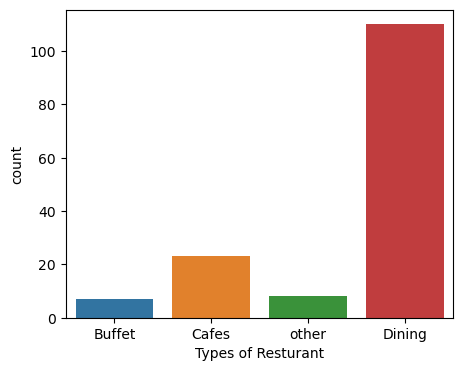

In [15]:
plt.figure(figsize=(5,4))
sns.countplot(x=data['listed_in(type)'])
plt.xlabel('Types of Resturant')
plt.show()

- CONCLUSION : Majority of Resturant falls in Dining Category

### Q2) How many votes has each type of resturant received from customers ?

In [16]:
data.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [34]:
group_data = data.groupby('listed_in(type)')['votes'].sum()
group_data

listed_in(type)
Buffet     3028
Cafes      6434
Dining    20363
other      9367
Name: votes, dtype: int64

In [44]:
result = pd.DataFrame({'votes':group_data})
result

,votes
listed_in(type),
Buffet,3028
Cafes,6434
Dining,20363
other,9367


Text(0, 0.5, 'Votes')

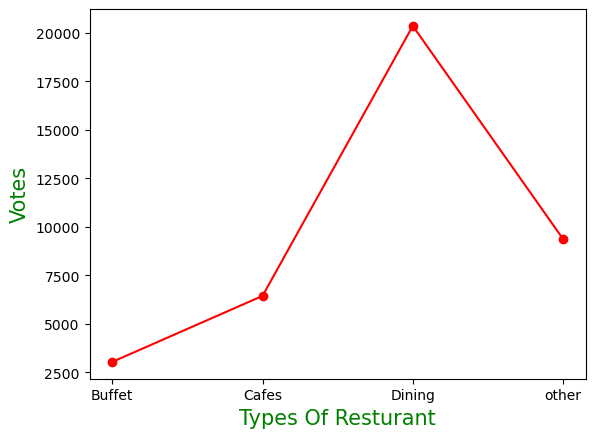

In [52]:
plt.plot(result,c='red',marker = 'o')
plt.xlabel('Types Of Resturant',color='green',size=15)
plt.ylabel('Votes',color='green',size=15)

- CONCLUSION : Dining Resturants has received Maximum votes

### Q3) What are the ratings that the majority of resturants have received?

In [53]:
data.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


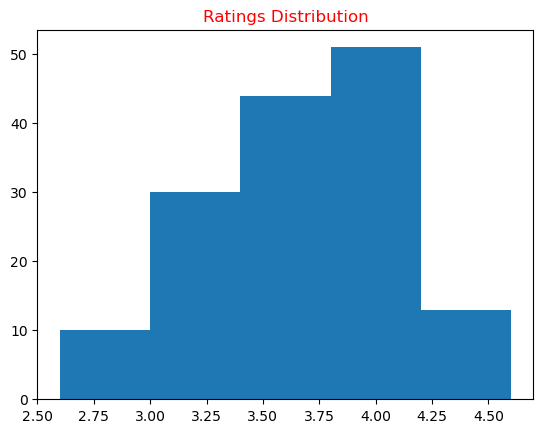

In [57]:
plt.hist(data['rate'],bins=5)
plt.title('Ratings Distribution',color = 'red')
plt.show()

- CONCLUSION : Majority of resturants has received rating from 3.5 to 4

### Q4) Zomato has observed that most couples order most of their food online. what is there average spending on each order?

#### Average order spending by couples

In [58]:
data.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


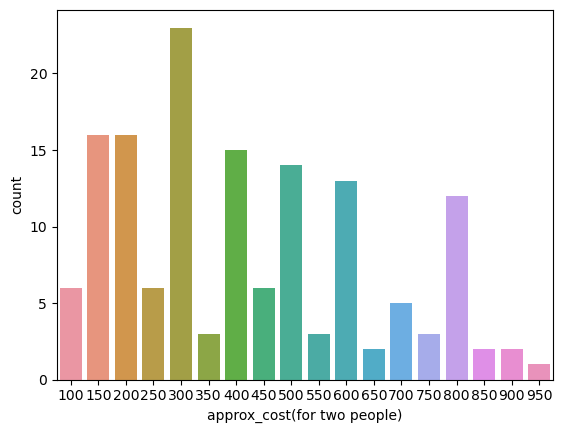

In [64]:
couple_data = data['approx_cost(for two people)']
sns.countplot(x = couple_data)
plt.show()

- CONCLUSION : The majority of couples prefer resturants with approximate cost of 300 rupees

### Q5) Which mode (online or offline) has received the maximum rating?

In [66]:
data.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


<Axes: xlabel='online_order', ylabel='rate'>

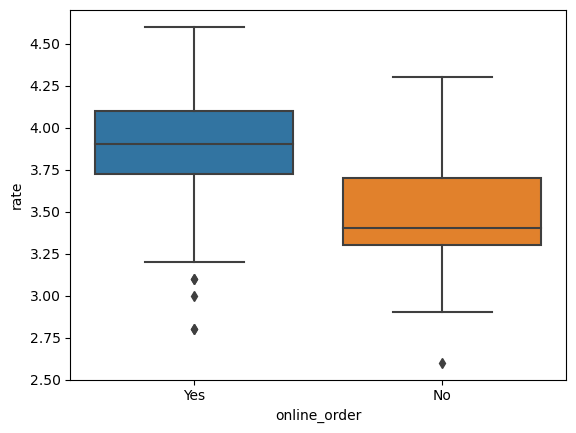

In [69]:
sns.boxplot(data=data,x='online_order',y='rate')

- CONCLUSION : Offline order received lower rating as compare to Online orders

### Q6) Which type of resturant received more offline orders, so that Zomato can provide customers with good offers

In [72]:
data.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


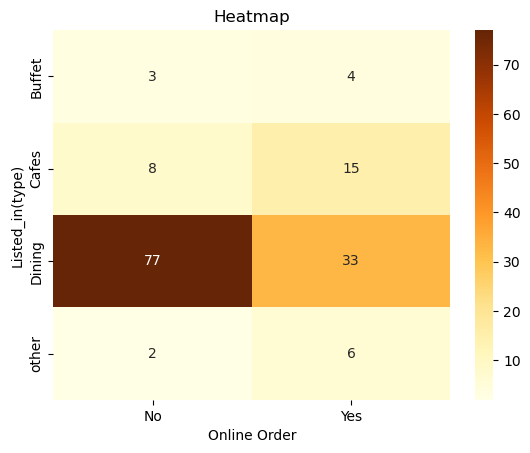

In [85]:
pivot_table = data.pivot_table(index='listed_in(type)',columns='online_order',aggfunc='size',fill_value=0)
sns.heatmap(pivot_table,annot=True,cmap='YlOrBr',fmt='d')
plt.title('Heatmap')
plt.xlabel('Online Order')
plt.ylabel('Listed_in(type)')
plt.show()

CONCLUSION : 
- Dining Resturants primarily accepts Offline orders
- Cafe primarily receive online orders
- This suggests that client prefers to placed online orders in person at resturants, but prefer online ordering at cafes.